In [1]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(7)

(train_x, train_y),(test_x, test_y) = mnist.load_data()

train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255

Using TensorFlow backend.


# Add Border

In [2]:
x_train = []
x_test = []
for i in train_x:
    constant= cv2.copyMakeBorder(i,8,8,8,8,cv2.BORDER_CONSTANT,value=0)
    x_train.append(constant)
    
for i in test_x:
    constant= cv2.copyMakeBorder(i,8,8,8,8,cv2.BORDER_CONSTANT,value=0)
    x_test.append(constant)

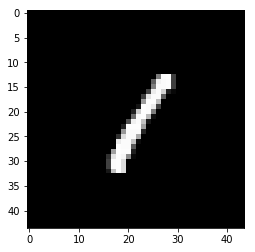

In [3]:
trainx = np.expand_dims(np.array(x_train),axis=-1)
testx = np.expand_dims(np.array(x_test),axis=-1)

plt.imshow(trainx[3].reshape(44,44), cmap='gray')

# Part-A Model 

In [4]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',padding='same', input_shape=(44,44,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Part-B Model

In [5]:
model1 = Sequential()
model1.add(Conv2D(32,(5,5),activation='relu',padding='same', input_shape=(44,44,1)))
model1.add(MaxPool2D(pool_size=(4,4),strides=4))
model1.add(Conv2D(32,(5,5),activation='relu',padding='same'))
model1.add(MaxPool2D(pool_size=(4,4),strides=4))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training

In [6]:
record = model.fit(trainx, train_y,validation_data=(testx,test_y), epochs=20, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.1992 - acc: 0.9430 - val_loss: 0.0828 - val_acc: 0.9755
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0677 - acc: 0.9799 - val_loss: 0.0619 - val_acc: 0.9809
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0491 - acc: 0.9851 - val_loss: 0.0602 - val_acc: 0.9794
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0522 - val_acc: 0.9846
Epoch 5/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0302 - acc: 0.9907 - val_loss: 0.0501 - val_acc: 0.9856
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.0497 - val_acc: 0.9853
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0194 - acc: 0.9945 - val_loss: 0.0530 -

In [7]:
record1 = model1.fit(trainx, train_y,validation_data=(testx,test_y), epochs=20, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.3252 - acc: 0.9142 - val_loss: 0.1048 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0872 - acc: 0.9738 - val_loss: 0.0790 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0641 - acc: 0.9801 - val_loss: 0.0557 - val_acc: 0.9820
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0495 - acc: 0.9850 - val_loss: 0.0418 - val_acc: 0.9861
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0461 - val_acc: 0.9856
Epoch 6/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0364 - acc: 0.9890 - val_loss: 0.0471 - val_acc: 0.9848
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0357 -

# Prediction

## Original Image

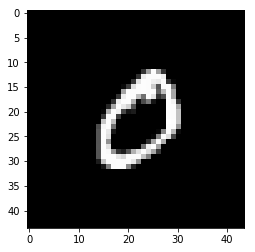

In [8]:
plt.imshow(trainx[1].reshape(44,44), cmap='gray')

## Prediction for original Image

In [9]:
print('Model-1', np.argmax(model.predict(np.expand_dims(trainx[1],axis=0))))
print('Model-2', np.argmax(model1.predict(np.expand_dims(trainx[1],axis=0))))

Model-1 0
Model-2 0


# Translate upto 10 pixels using ImageDataGenerator

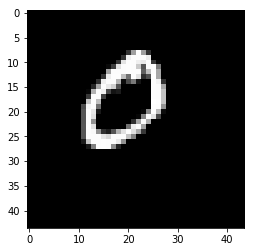

In [49]:
datagen = ImageDataGenerator(height_shift_range=6,width_shift_range=6)
b = datagen.random_transform(trainx[1])
plt.imshow(b.reshape(44,44), cmap='gray')

# Translated Prediction

In [50]:
print('Model-1', np.argmax(model.predict(np.expand_dims(b,axis=0))))
print('Model-2', np.argmax(model1.predict(np.expand_dims(b,axis=0))))

Model-1 2
Model-2 0
